In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import math
from vyper.utils import SizeLimits
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv("../../data/cbrt_analysis.csv")
data["input"] = data["input"].apply(lambda x: mpz(x))
data["cbrt_ideal"] = data["cbrt_ideal"].apply(lambda x: mpz(x))
data["cbrt_implementation"] = data["cbrt_implementation"].apply(lambda x: mpz(x))
data["diff_ideal_impl"] = data["cbrt_ideal"] - data["cbrt_implementation"]

data

,input,cbrt_ideal,cbrt_implementation,gasused,diff_ideal_impl
0,8068081371718483574354420468191834557074584029...,43210579420052024747402573978762,45220989913191622272136532,1899,43210534199062111555780301842230
1,10889035741470030830827987437816582766592,22164765511026542513,22164765511030041828,1899,-3499315
2,1267650600228229401496703205376,10822639409680928,10822639409682637,1863,-1709
3,22835963083295358096932575511191922182123945984,2837089985411397441679,2837089985411845354071,1845,-447912392
4,1264429211832293203861166465115123652708031223...,23296902041234874683280677253097,37062003370186273278653304,1899,23296864979231504497007398599793
...,...,...,...,...,...
9995,2410142845892012338575446439246417673519323057...,28885569061065329746486256996183,29550499372569016164072845,1881,28885539510565957177470092923338
9996,5182723950782344230675566744516830964133444866...,37283730420997636384071855376262,26547688629855357852661699,1881,37283703873309006528714002714563
9997,8779088833526345143075677247813817487678038453...,44444342035969368585043095122292,37301537542622868109839084,1899,44444304734431825962174985283208
9998,3682085119387954350925525351387884265630769061...,15441800642855763848016576737515,34704614812226075215709107,1899,15441765938240951621941361028408


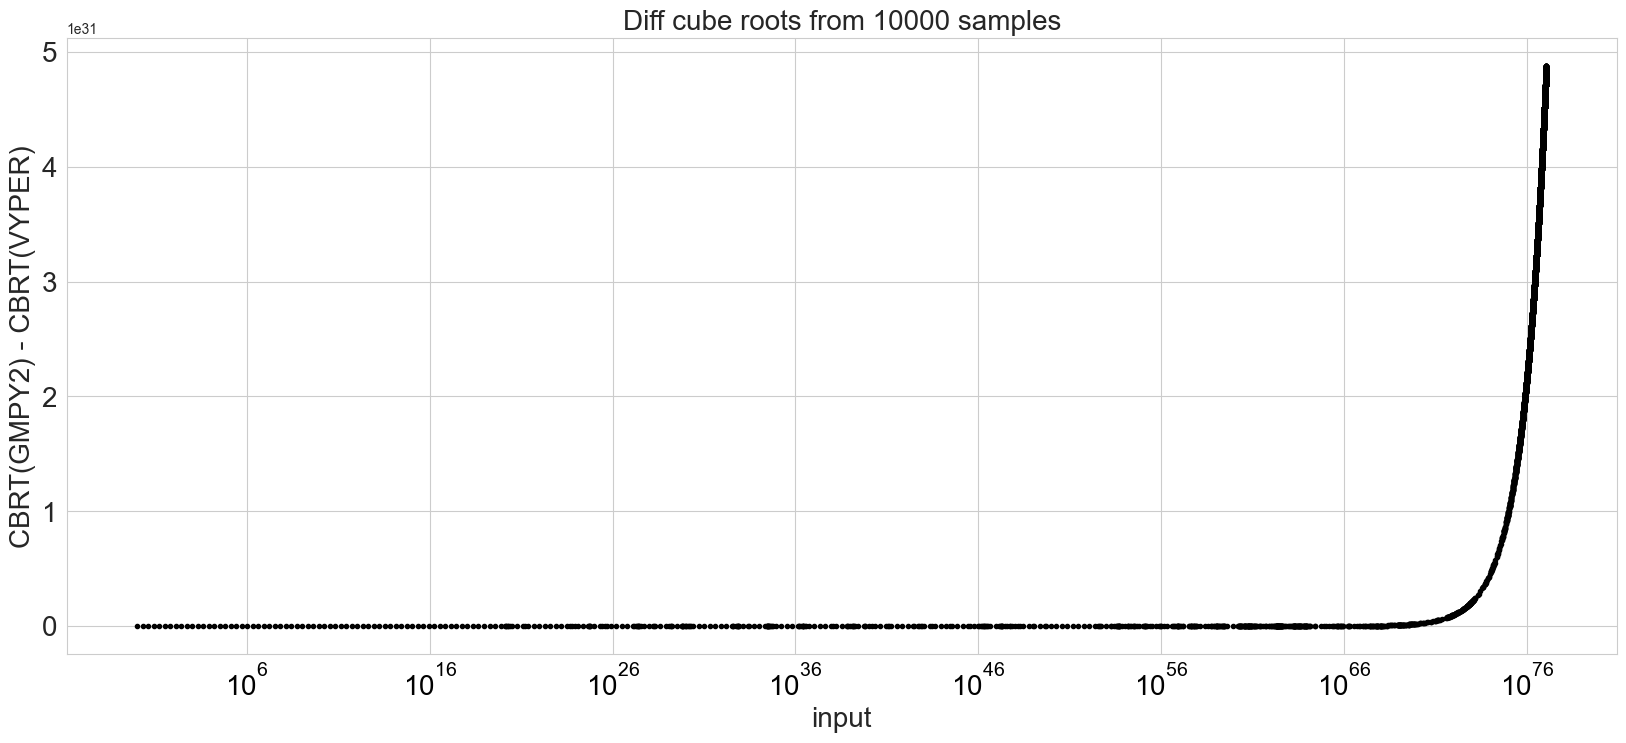

In [3]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.input,
    data.diff_ideal_impl,
    '.',
    color="black",
)


ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("CBRT(GMPY2) - CBRT(VYPER)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_title(f"Diff cube roots from {data.shape[0]} samples", fontsize=20);

In [6]:
exact_data = data[(data.diff_ideal_impl == 0)]
exact_data.input.astype(float).describe()

count    2.300000e+02
mean     4.092289e+56
std      3.037928e+57
min      1.000000e+00
25%      1.801440e+17
50%      1.267651e+31
75%      2.995862e+45
max      3.740746e+58
Name: input, dtype: float64

In [7]:
not_exact_data = data[(data.diff_ideal_impl != 0)]
not_exact_data.input.astype(float).describe()

count    9.770000e+03
mean     4.937492e+76
std      3.397635e+76
min      1.475740e+20
25%      1.942339e+76
50%      4.726888e+76
75%      7.715027e+76
max      1.157890e+77
Name: input, dtype: float64

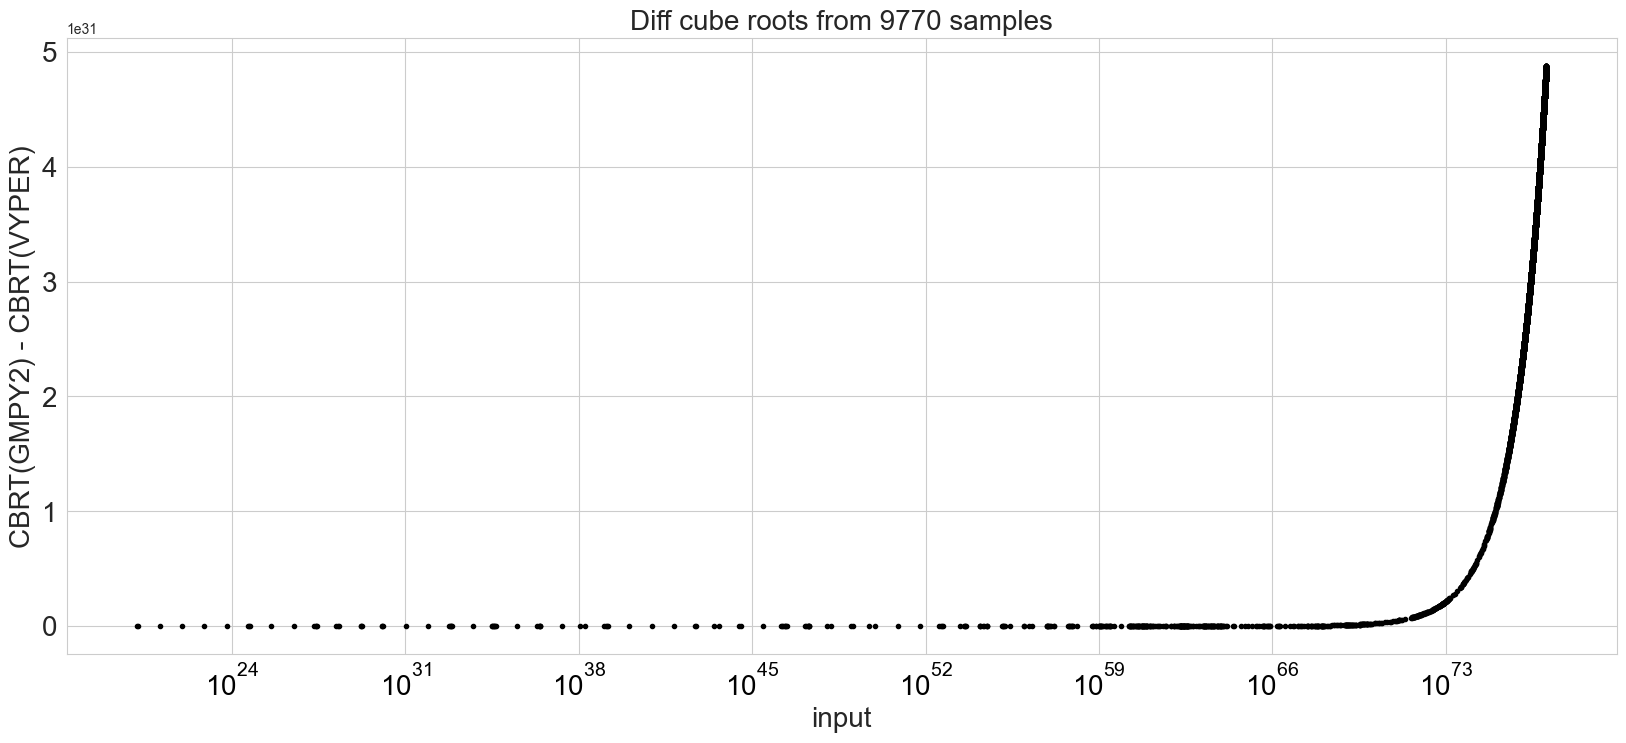

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    not_exact_data.input,
    not_exact_data.diff_ideal_impl,
    '.',
    color="black",
)


ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("CBRT(GMPY2) - CBRT(VYPER)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_yscale("symlog")
ax.set_title(f"Diff cube roots from {not_exact_data.shape[0]} samples", fontsize=20);

# Gas Profile

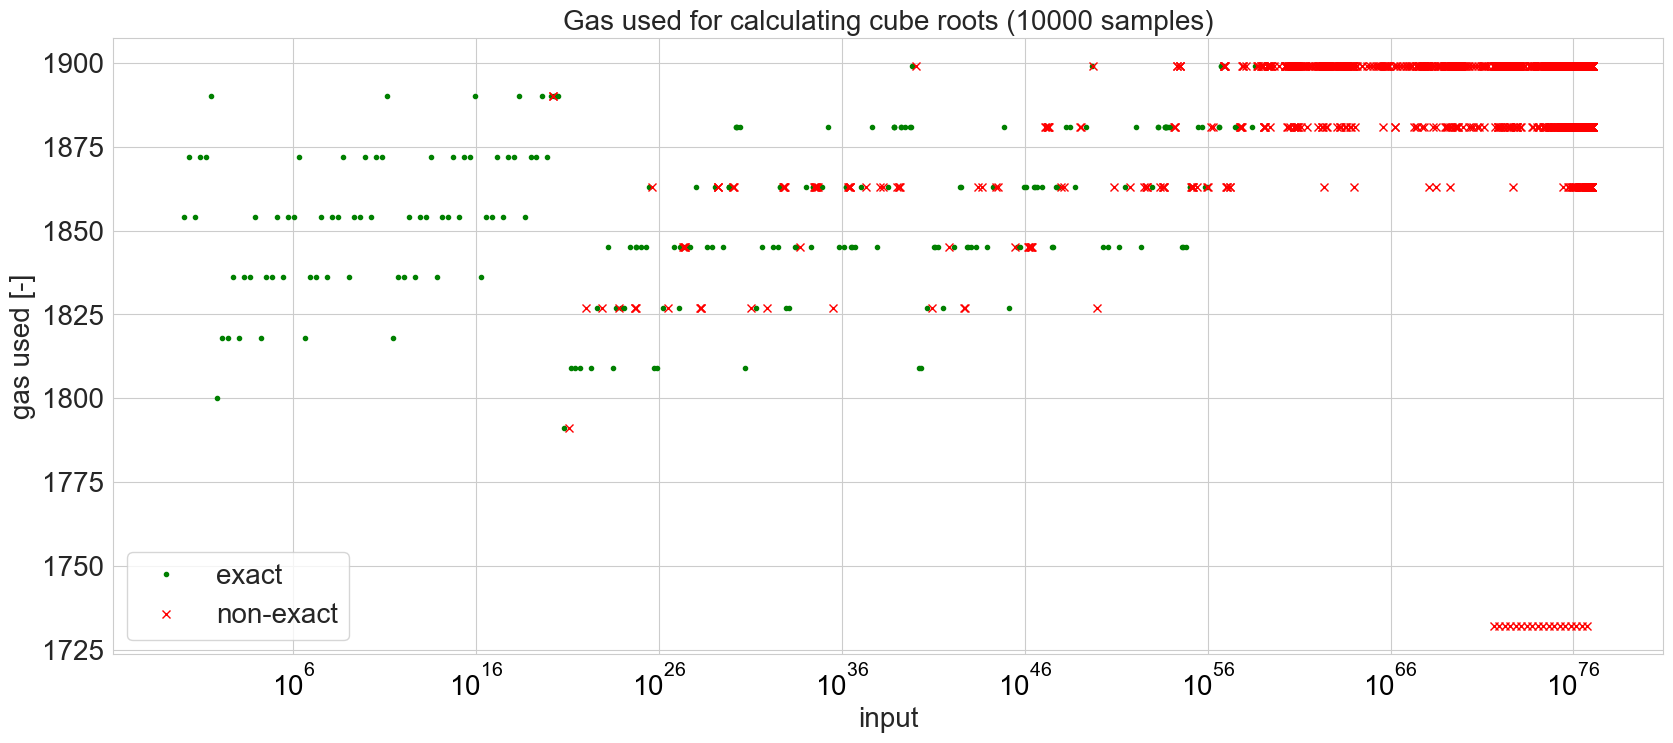

In [10]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data[data.diff_ideal_impl == 0].input,
    data[data.diff_ideal_impl == 0].gasused,
    '.',
    color="green",
    label="exact"
)
ax.plot(
    data[data.diff_ideal_impl != 0].input,
    data[data.diff_ideal_impl != 0].gasused,
    'x',
    color="red",
    label="non-exact"
)

ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("gas used [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.legend(fontsize=20)
ax.set_title(f"Gas used for calculating cube roots ({data.shape[0]} samples)", fontsize=20);